<a href="https://colab.research.google.com/github/sofia-sunny/Introductory_Tutorials/blob/main/04_Molecular_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Molecular Similarity Search**

**Molecular similarity** is based on the principle that **molecules with similar chemical structures tend to exhibit similar chemical and biological behaviors**. This idea is widely used in drug discovery and cheminformatics, where researchers assume that if two molecules look alike at the molecular level, they are also likely to act alike—for example, by binding to the same target or producing similar biological effects.

A **similarity search** is a method used to find molecules that resemble a specific compound, known as the **query compound**. The goal is to scan a database and identify other compounds that share key structural features with the query.
The similarity between molecules is measured using mathematical metrics, such as the **Tanimoto coefficient**, which compares **molecular fingerprints** (numerical representations of chemical features). The higher the similarity score, the more structurally alike two molecules are considered to be.

The Similarity Search helps prioritize candidates for further testing or development based on their resemblance to known active compounds.

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 11.5 MB/s eta 0:00:00


**A general way to find the similarity between two compunds is as follow:**

* Convert SMILES to RDKit molecule objects


* Generate Morgan fingerprints


* Compute similarity

The `rdFingerprintGenerator module` in RDKit provides tools to create different types of molecular fingerprints, such as **Morgan fingerprints**. These fingerprints numerically encode molecular structure.

The `DataStructs module` contains functions for comparing molecular fingerprints. It provides tools for computing similarity between two fingerprints—commonly using the Tanimoto similarity


In [2]:
# Importing necessary libraries
from rdkit import Chem
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from rdkit.Chem import DataStructs

### **Example of steps for finding similarity betweeen two compounds**

In [4]:
# SMILES strings for two molecules
smiles_1 = "CC(=O)O"
smiles_2 = "CC(C)CCO"

In [9]:
# Convert SMILES to RDKit molecule objects
mol_1 = Chem.MolFromSmiles(smiles_1)
mol_2 = Chem.MolFromSmiles(smiles_2)

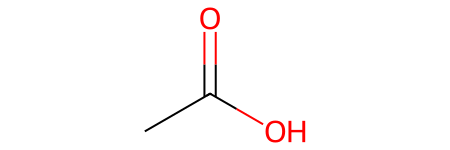

In [10]:
display(mol_1)

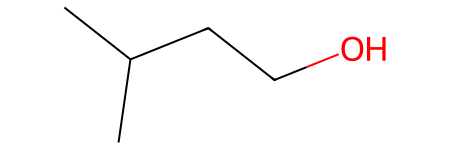

In [11]:
display(mol_2)

### **Create a Morgan Generaor**
`GetMorganGenerator`allows you to generate a **Morgan fingerprint generator** with specific parameters. This generator can then be used to create **Morgan fingerprints** for multiple molecules without needing to specify the parameters each time

In [15]:
# Create a Morgan Generator
morgan_generator = GetMorganGenerator(radius=2, fpSize=2048)

### **Create molecular fingerprints!**
### After creating **morgan_generator**, you can use it to generate **Morgan fingerprints** for various molecules.

**Morgan fingerprints** is a way to encode the structural information of a molecule into a fixed-size binary or integer vector. These fingerprints are useful for tasks like similarity searches, clustering, and as input features for machine learning model.

In [16]:
# Generate Morgan fingerprints
fp1 = morgan_generator.GetFingerprint(mol_1)
fp2 = morgan_generator.GetFingerprint(mol_2)

### **Tanimoto similarity**
After generating molecular fingerprints using the Morgan generator, you can compute the **Tanimoto similarity** between pairs of these fingerprints. The Tanimoto similarity is a common metric used in cheminformatics to quantify the similarity between two molecular fingerprints.

If the Tanimoto similarity is **close to 1**, it means that the molecules have very similar structural features.

If the Tanimoto similarity is **close to 0**, it means that the molecules have very different structural features

In [17]:
# Compute Tanimoto similarity
similarity_score = DataStructs.TanimotoSimilarity(fp1, fp2)

In [18]:
# Print the similarity
print(f"Tanimoto similarity: {similarity_score:.2f}")

Tanimoto similarity: 0.12


A **score of 0.12** is closer to 0, which suggests that the two molecules share very few common substructures or features. In other words, their chemical structures are quite different from each other

### **Now let's find the similarity between aspirin and ibuprofen!**

In [19]:
# SMILES strings for Aspirin and Ibuprofen
aspirin_smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
ibuprofen_smiles = "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O"

In [20]:
# Convert SMILES to RDKit molecule objects
aspirin_mol = Chem.MolFromSmiles(aspirin_smiles)
ibuprofen_mol = Chem.MolFromSmiles(ibuprofen_smiles)

In [21]:
# Generate Morgan fingerprints (ECFP4)
aspirin_fp = morgan_generator.GetFingerprint(aspirin_mol)
ibuprofen_fp = morgan_generator.GetFingerprint(ibuprofen_mol)

In [22]:
# Compute Tanimoto similarity
similarity = DataStructs.TanimotoSimilarity(aspirin_fp, ibuprofen_fp)

In [23]:
# Print the similarity
print(f"Tanimoto similarity between Aspirin and Ibuprofen: {similarity:.2f}")

Tanimoto similarity between Aspirin and Ibuprofen: 0.20


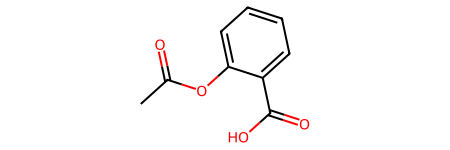

In [24]:
aspirin_mol

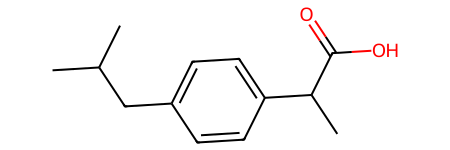

In [25]:
ibuprofen_mol

### **Now let's calculate the similarity score between Aspirin and several other compounds, and then display the results**

In [ ]:
# Importing necessary libraries (if already not imported)
import pandas as pd

In [29]:
# SMILES strings for Aspirin and a list of other compounds
aspirin_smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
other_drugs = {
    "Ibuprofen": "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O",
    "Caffeine": "CN1C=NC2=C1C(=O)N(C(=O)N2C)C",
    "Naproxen": "CC1=CC=C(C=C1)C(C)C(=O)O",
    "Acetaminophen": "CC(=O)NC1=CC=C(C=C1)O"
}

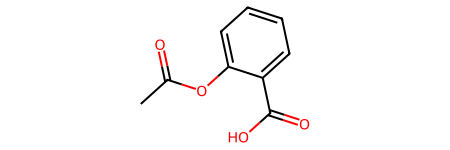

In [30]:
# Convert SMILES to RDKit molecule objects and generate fingerprints for Aspirin
aspirin_mol = Chem.MolFromSmiles(aspirin_smiles)
aspirin_mol

In [31]:
aspirin_fp = morgan_generator.GetFingerprint(aspirin_mol)

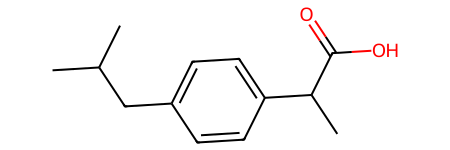

Ibuprofen
Tanimoto similarity between Aspirin and Ibuprofen: 0.20


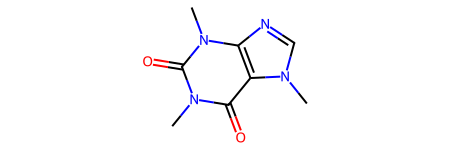

Caffeine
Tanimoto similarity between Aspirin and Caffeine: 0.09


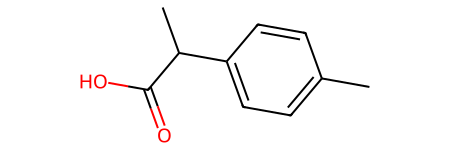

Naproxen
Tanimoto similarity between Aspirin and Naproxen: 0.22


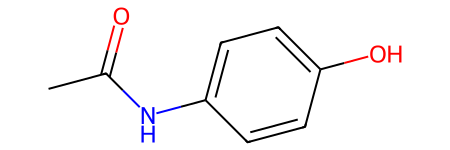

Acetaminophen
Tanimoto similarity between Aspirin and Acetaminophen: 0.22


In [32]:
# Initiate the list for similaities
similarities = []

# Compute Tanimoto similarity for each drug
for drug, smiles in other_drugs.items():
    drug_mol = Chem.MolFromSmiles(smiles)
    display(drug_mol)
    print(drug)
    drug_fp = morgan_generator.GetFingerprint(drug_mol)
    similarity = DataStructs.TanimotoSimilarity(aspirin_fp, drug_fp)
    print(f"Tanimoto similarity between Aspirin and {drug}: {similarity:.2f}")
    similarities.append((drug, similarity))

### Similarity score between Toluene and some other aromatic compounds

In [33]:
# List of aromatic compounds SMILES (excluding Toluene itself)
smiles_list = [
    'c1ccccc1',   # Benzene
    'CC1=CC=CC=N1',  # Methylpyridine
    'c1ccc2ccccc2c1',  # Naphthalene
    'c1ccccc1O',  # Phenol
    'CC1=CC=CC=C1C'  # O-Xylene
]

In [34]:
# Toluene SMILES
toluene_smiles = 'Cc1ccccc1'

# Convert SMILES to molecule objects
toluene_mol = Chem.MolFromSmiles(toluene_smiles)
toluene_fp = morgan_generator.GetFingerprint(toluene_mol)

In [36]:
molecules_list = []
# Convert SMILES to molecule objects using a for loop
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    molecules_list.append(mol)
# molecules_list is a list of molecule objects for aromatic compounds

In [37]:
# Generate Morgan fingerprints
fingerprints_list = []
for mol in molecules_list:
    fp = morgan_generator.GetFingerprint(mol)
    fingerprints_list.append(fp)

In [ ]:
# Calculate similarity (Tanimoto similarity) to Toluene
similarities_list = []
for fp in fingerprints_list:
    similarity = DataStructs.TanimotoSimilarity(toluene_fp, fp)


    similarities_list.append(similarity)

In [ ]:
similarities

[0.2727272727272727, 0.35, 0.35714285714285715, 0.375, 0.5]

### **Another Example:**
Finding the Similarity between Toluene and some other aromatic compounds

In [ ]:
# SMILES for Toluene
toluene_smiles = 'Cc1ccccc1'
toluene_mol = Chem.MolFromSmiles(toluene_smiles)

In [40]:
# Generate fingerprint for Toluene
morgan_generator = Chem.rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)
toluene_fp = morgan_generator.GetFingerprint(toluene_mol)

In [42]:
# A dictionary of some aromatic compounds
other_aromatics = {
    'Benzene': 'c1ccccc1',
    'Methylpyridine': 'CC1=CC=CC=N1',
    'Naphthalene': 'c1ccc2ccccc2c1',
    'Phenol': 'c1ccccc1O',
    'O-Xylene': 'CC1=CC=CC=C1C'
    }

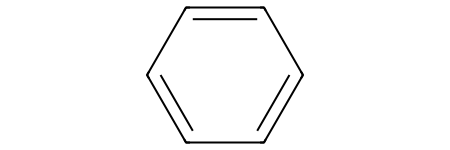

Benzene
Tanimoto similarity between Toluene and Benzene: 0.27


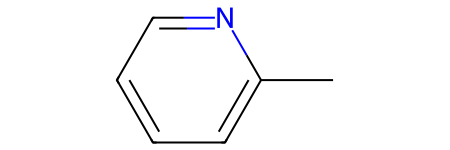

Methylpyridine
Tanimoto similarity between Toluene and Methylpyridine: 0.35


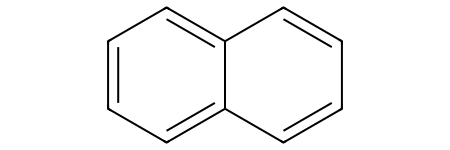

Naphthalene
Tanimoto similarity between Toluene and Naphthalene: 0.36


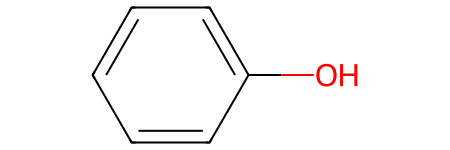

Phenol
Tanimoto similarity between Toluene and Phenol: 0.38


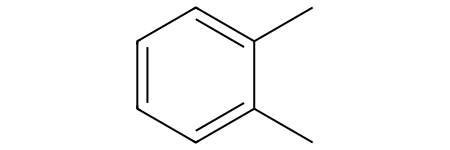

O-Xylene
Tanimoto similarity between Toluene and O-Xylene: 0.50


In [43]:
# Compute similarity and display
similarities = []

for compound, smiles in other_aromatics.items():
    mol = Chem.MolFromSmiles(smiles)
    display(mol)
    print(compound)
    fp = morgan_generator.GetFingerprint(mol)
    similarity = DataStructs.TanimotoSimilarity(toluene_fp, fp)
    print(f"Tanimoto similarity between Toluene and {compound}: {similarity:.2f}")
    similarities.append((compound, similarity))


So among these aromatic compounds, o-Xylene is the most similar to Toluene.